# Figure 3 Codes

In [3]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import os
import sys
current_path = os.getcwd()
parent_directory = os.path.dirname(current_path)
sys.path.append(parent_directory)  # Adds the parent directory to the Python path
from Class.jenie import Jenie
import scanpy as sc
import anndata
import pandas as pd
import numpy as np

# Figure B

Representative 2D partial UMAPs of PTB and Saline injected 1 year old mice

In [5]:
cbm5_ing = sc.read("../DataF/fig3/ingested_cbm5_svz.h5ad")
cbm5_svz = cbm5_ing[cbm5_ing.obs.new_clusters.isin([str(x) for x in range(12)])]

In [6]:
cbm5_svz_ptb = cbm5_svz[cbm5_svz.obs["Treatment"] == "PTB-ASO"]
cbm5_svz_sal = cbm5_svz[cbm5_svz.obs["Treatment"] == "Saline"]

cbm5_ptbj = Jenie(cbm5_svz_ptb, "CBM5 SVZ ptb", "cbm5_ptb_new", "svz_cbm2")
cbm5_salj = Jenie(cbm5_svz_sal, "CBM5 SVZ sal", "cbm5_sal_new", "svz_cbm2")

/Users/kjenie/Programming/activation_of_quiescent_neurogenic_niches_of_aging_brain/Class/jenie.py:972: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.data.obs["x"] = "x"
/Users/kjenie/DataspellProjects/ptb_timepoints/.conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/kjenie/DataspellProjects/ptb_timepoints/.conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:369: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  ax.scatter(
/Users/kjenie/DataspellProjects/ptb_timepoints/.conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:379: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  ax.scatter(


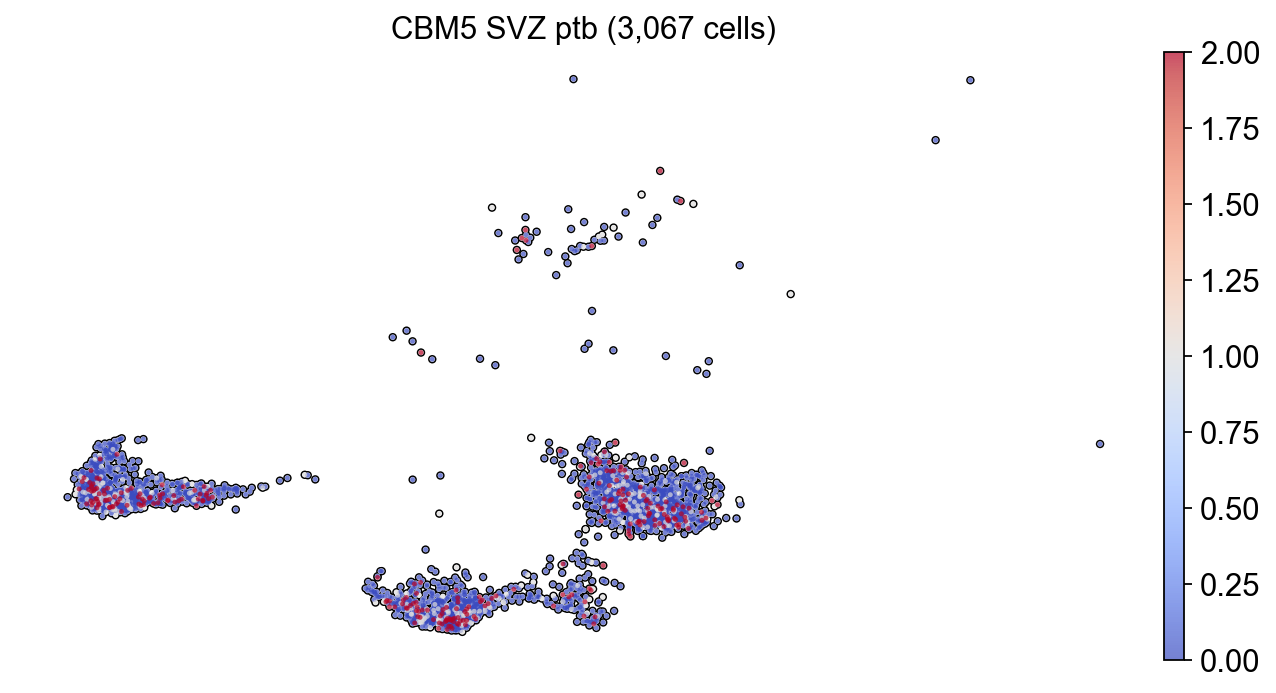

In [7]:
cbm5_ptbj.umap("Ptbp1", vmax=2, fig=(10,5))

/Users/kjenie/Programming/activation_of_quiescent_neurogenic_niches_of_aging_brain/Class/jenie.py:972: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.data.obs["x"] = "x"
/Users/kjenie/DataspellProjects/ptb_timepoints/.conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/kjenie/DataspellProjects/ptb_timepoints/.conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:369: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  ax.scatter(
/Users/kjenie/DataspellProjects/ptb_timepoints/.conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:379: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  ax.scatter(


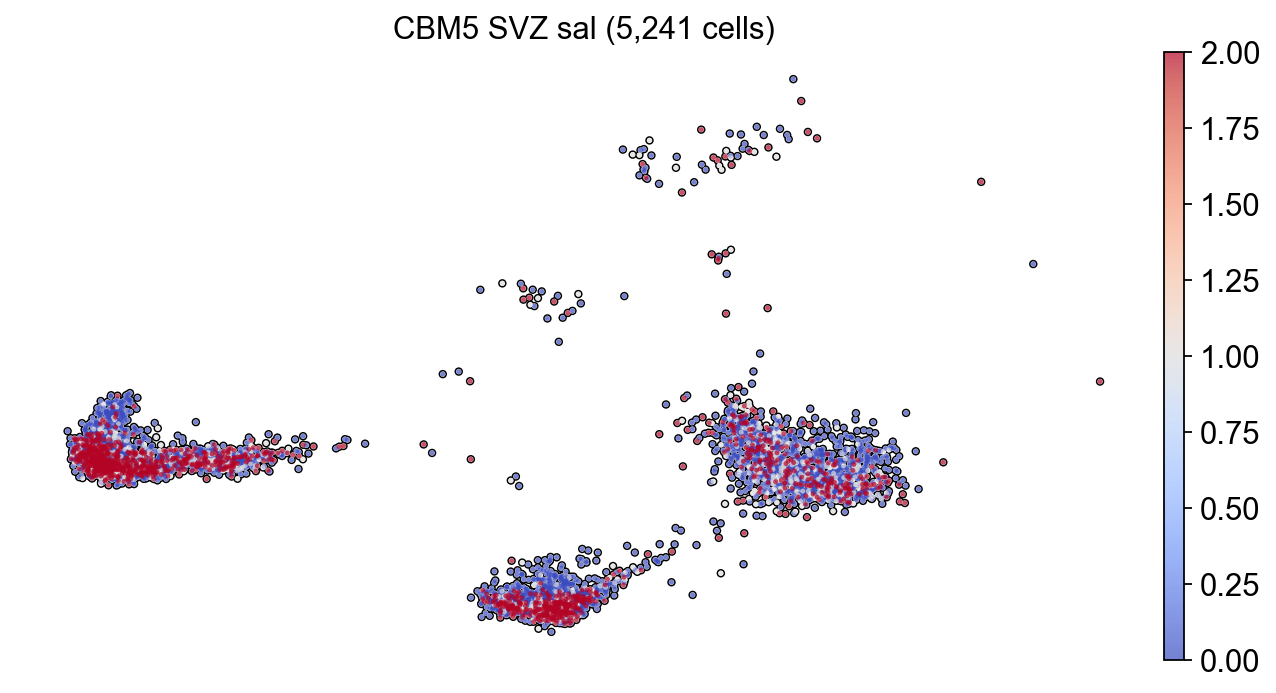

In [8]:
cbm5_salj.umap("Ptbp1", vmax=2, fig=(10,5))

# Figure D, E, F, G

Quantification of mRNA levels of PTBP1, REST, RTN4, and DCX in hippocampal astrocytes (D), ventricular astrocytes (E), choroid plexus (F), and ependymal cells (G) from 1 year old saline or PTBP1-ASO treated mice.

In [9]:
cbm5 = sc.read("../DataF/fig2/CBM5_new_PTB.h5ad")

/var/folders/j6/2g6n5jcx4dz5dncsnj0mt2p40000gn/T/ipykernel_55855/54732370.py:34: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/j6/2g6n5jcx4dz5dncsnj0mt2p40000gn/T/ipykernel_55855/54732370.py:34: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/j6/2g6n5jcx4dz5dncsnj0mt2p40000gn/T/ipykernel_55855/54732370.py:34: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


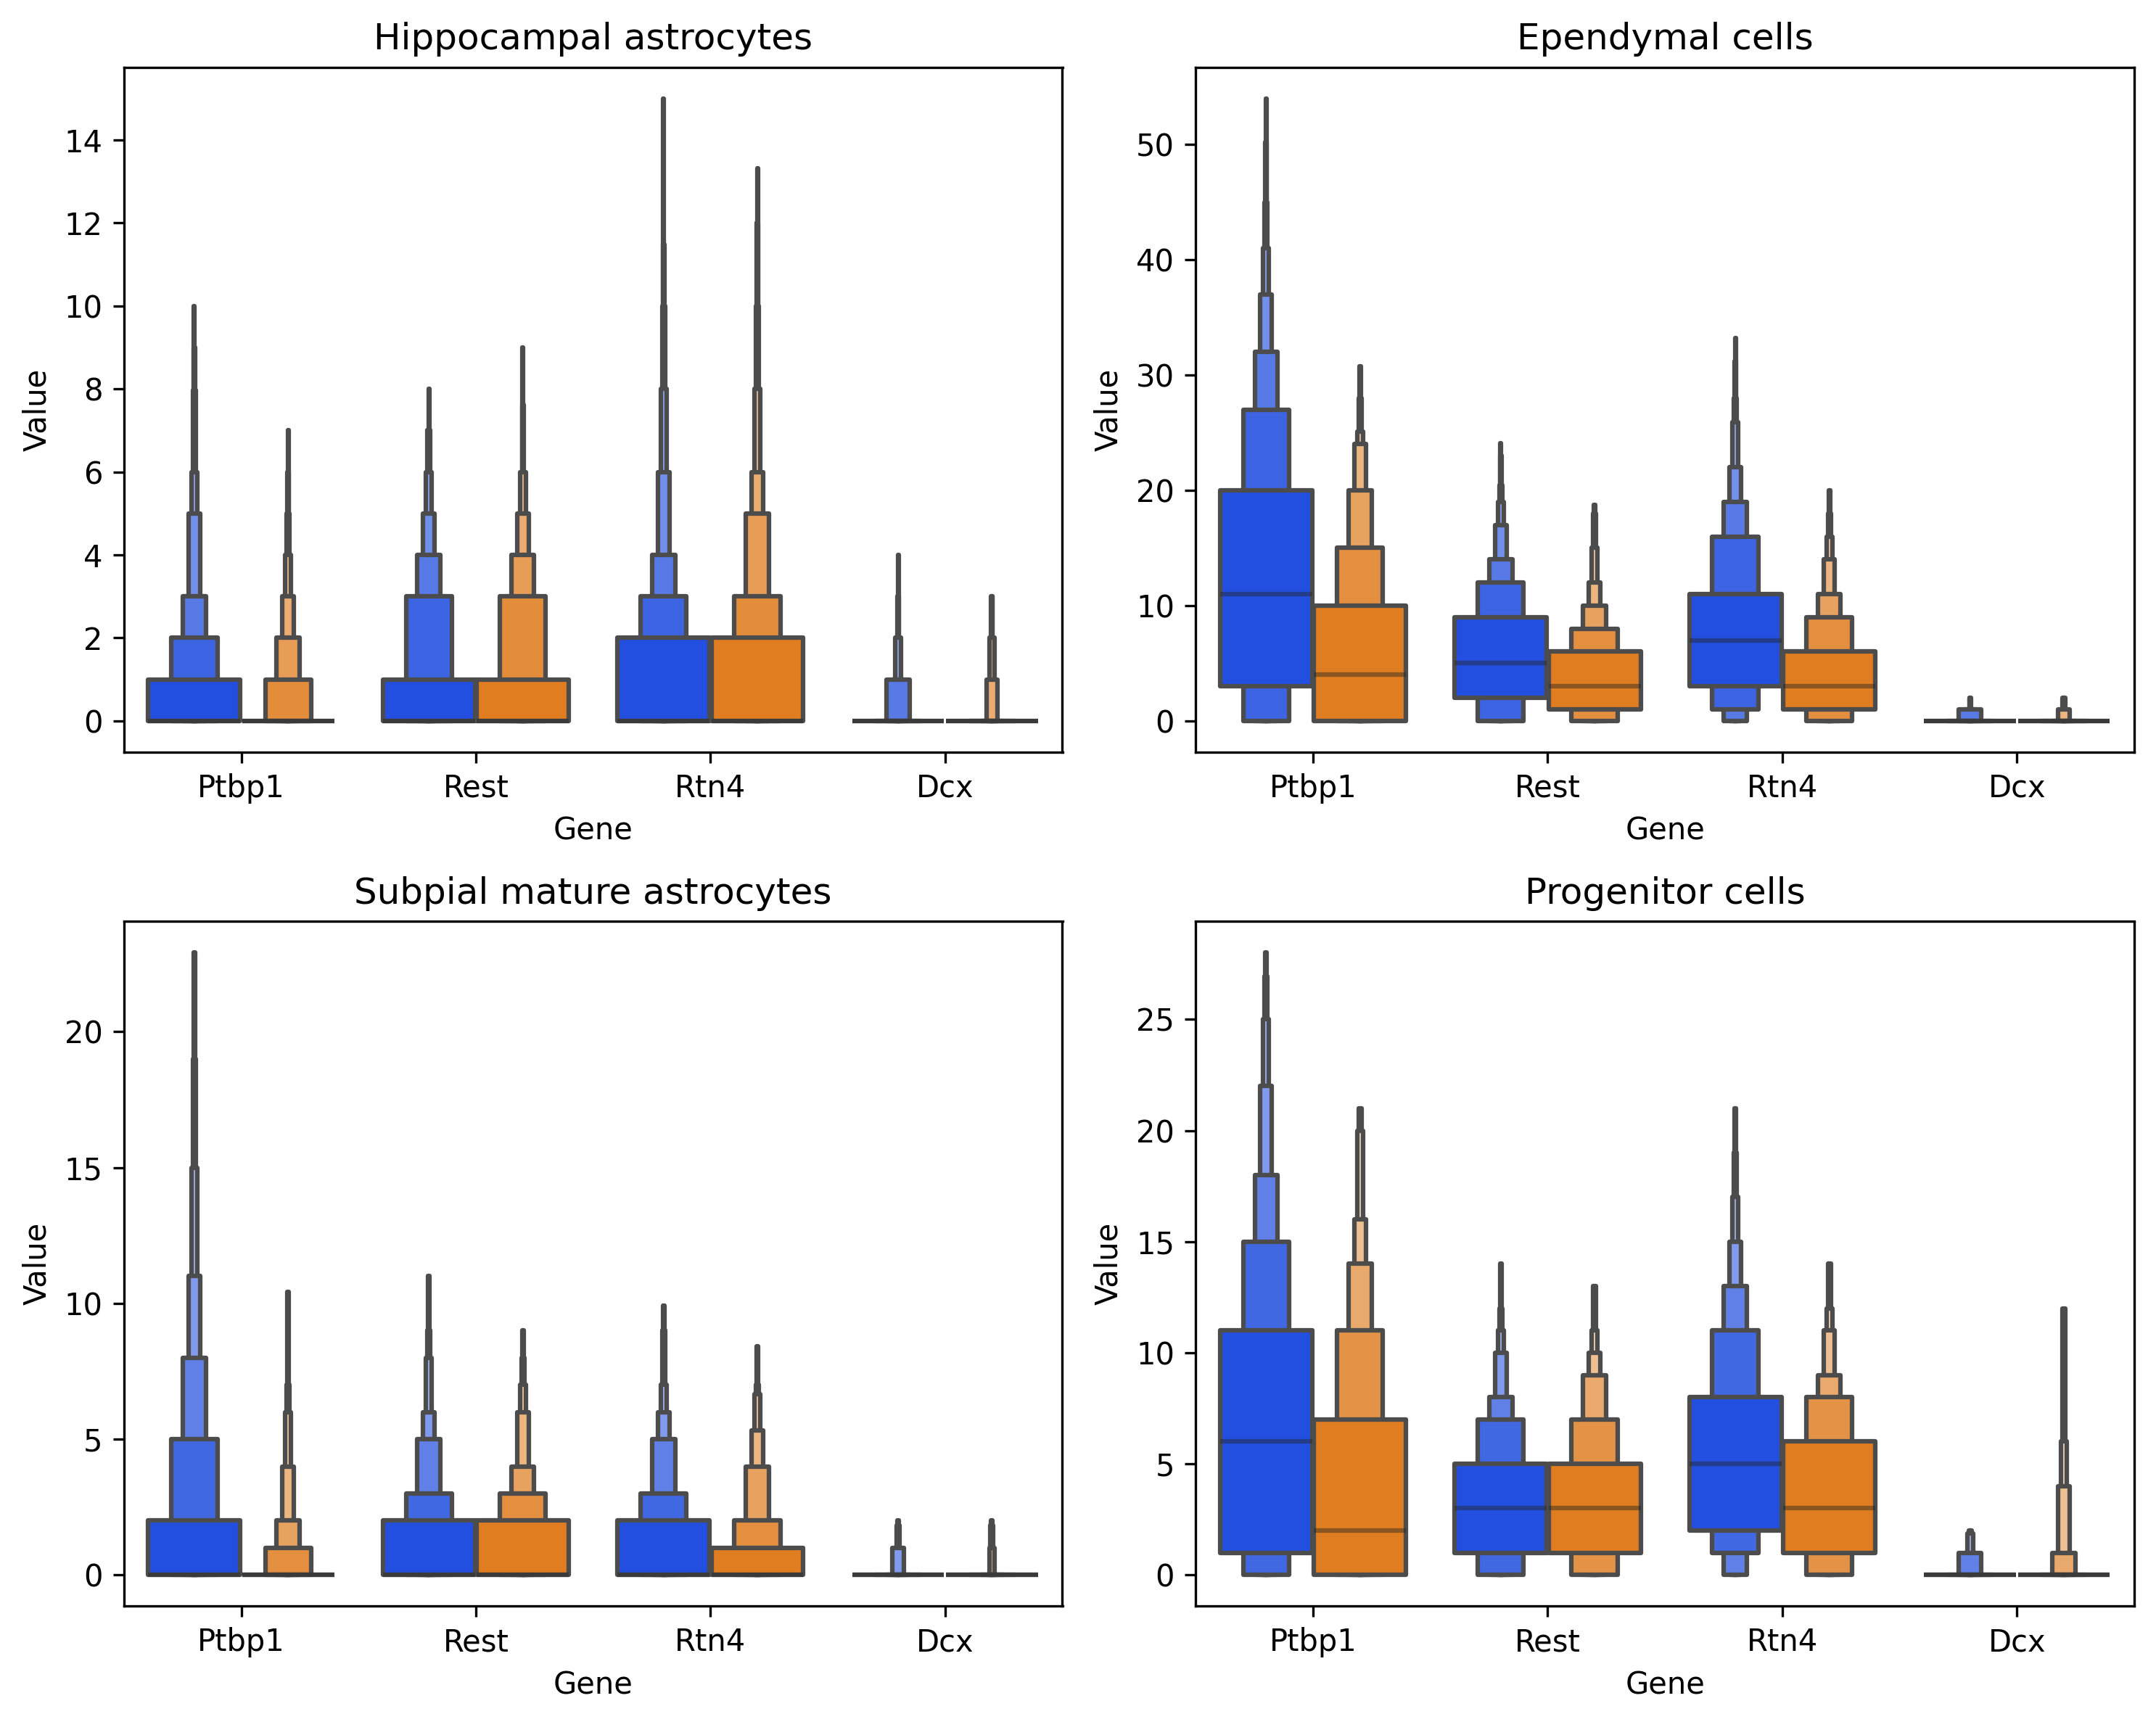

In [10]:
data = cbm5

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.style.use("default")

fig, axs = plt.subplots(2, 2, figsize=(10, 8), dpi=150, facecolor="w")
for i, cell in enumerate(["Hippocampal astrocytes", "Ependymal cells", "Subpial mature astrocytes","Progenitor cells", ]):
    ax = axs[np.unravel_index(i, (2, 2))]
    d= data[data.obs["MERFISH celltype"] == cell]

    df = pd.DataFrame(d.layers["Raw counts"], index=d.to_df().index, columns=d.to_df().columns)
    df["Ptbp1"] = d.obs["New_PTB"]
    df["Treatment"] = d.obs["Treatment"]
    df["MERFISH celltype"] = d.obs["MERFISH celltype"]

    # data
    genes = [ 
        "Ptbp1",
        "Rest", 
        "Rtn4",
        "Dcx",
        ]

    df_melted = df.melt(id_vars=['Treatment'], value_vars=genes)
    sns.boxenplot(data=df_melted, x='variable', y='value', ax=ax, hue='Treatment',showfliers=False, hue_order=["Saline", "PTB-ASO"], palette="bright", 
                )
    ax.legend([],[], frameon=False)
    ax.set_title(f"{cell}")
    ax.set_xlabel('Gene')
    ax.set_ylabel('Value')
    plt.tight_layout()

# plt.savefig("./figures/alsdkjfalskdfja8.png", dpi=300, bbox_inches="tight", transparent=True)

# Supplemental Figure 4

# Figure A

Heat map Pearson correlation plot between saline and PTBP-ASO injected mice comparing three different neuronal types including the DG hippocampal neurons, CA1 neurons and L3 cortical neurons

### Get DG hippocampal neurons, CA1 neurons and L3 cortical neurons Data

In [11]:
sub_cbm5 = cbm5[cbm5.obs["MERFISH celltype"].isin(["Mature DG neurons", "CA1 neurons", "L3 neurons"])]
ptbsub = sub_cbm5[sub_cbm5.obs["Treatment"] == "PTB-ASO"]
salsub = sub_cbm5[sub_cbm5.obs["Treatment"] == "Saline"]
print(ptbsub)
salsub

View of AnnData object with n_obs × n_vars = 4305 × 223
    obs: 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'leiden', 'leiden_denovo', 'Experiment', 'Age', 'Section', 'Mouse', 'Treatment', 'Timepoint', 'Ptbp1', 'MERFISH celltype', 'New_PTB'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'Mouse_colors', 'Section_colors', 'Treatment_colors', 'leiden', 'leiden_colors', 'leiden_denovo_colors', 'log1p', 'neighbors', 'pca'
    obsm: 'X_pca', 'X_spatial', 'X_umap', 'X_umap_denovo', 'rep'
    varm: 'PCs'
    layers: 'Raw counts'
    obsp: 'connectivities', 'distances'


View of AnnData object with n_obs × n_vars = 6151 × 223
    obs: 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'leiden', 'leiden_denovo', 'Experiment', 'Age', 'Section', 'Mouse', 'Treatment', 'Timepoint', 'Ptbp1', 'MERFISH celltype', 'New_PTB'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'Mouse_colors', 'Section_colors', 'Treatment_colors', 'leiden', 'leiden_colors', 'leiden_denovo_colors', 'log1p', 'neighbors', 'pca'
    obsm: 'X_pca', 'X_spatial', 'X_umap', 'X_umap_denovo', 'rep'
    varm: 'PCs'
    layers: 'Raw counts'
    obsp: 'connectivities', 'distances'

In [12]:
from scipy.stats import zscore
from scipy.stats import pearsonr

<Figure size 2250x2250 with 0 Axes>

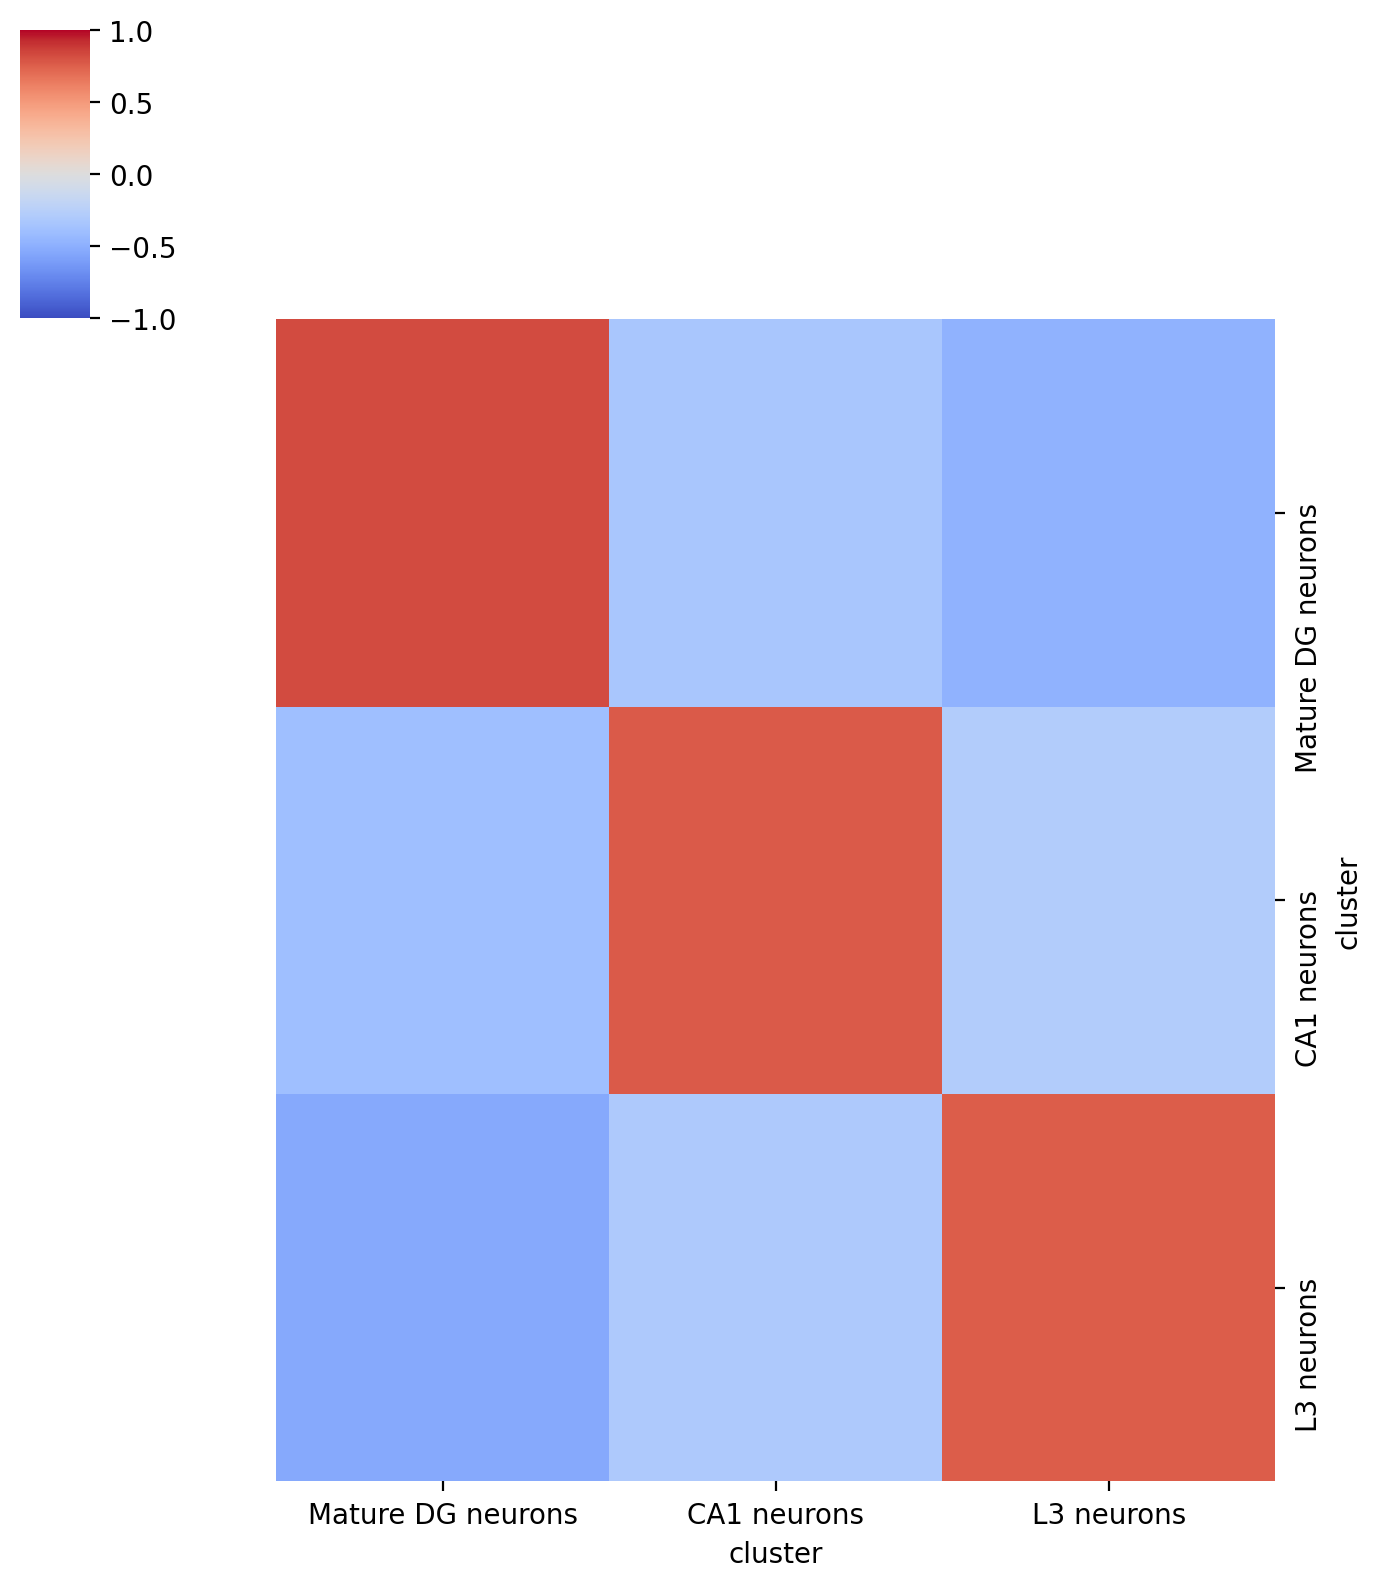

In [13]:
plt.style.use("default")
refdata = ptbsub
d = salsub

group = "MERFISH celltype"

common_genes = refdata.var_names.intersection(d.var_names)
cbmtemp = d[:,common_genes]
refdata = refdata[:,common_genes]

refdf = pd.DataFrame(data=refdata.layers["Raw counts"], columns=refdata.var_names, index=refdata.obs.index)
refdf["cluster"] = refdata.obs[group]
refdf["Ptbp1"] = refdata.obs["New_PTB"]
refmeans = refdf.groupby("cluster").mean()

cbmdf = pd.DataFrame(data=cbmtemp.layers["Raw counts"], columns=cbmtemp.var_names, index=cbmtemp.obs.index)
cbmdf["cluster"] = cbmtemp.obs[group]
cbmdf["Ptbp1"] = cbmtemp.obs["New_PTB"]
cbmmeans = cbmdf.groupby("cluster").mean()

refmeans = zscore(refmeans, axis=0)
cbmmeans = zscore(cbmmeans, axis=0)

# Get all the correlations
ps = []
for name1, row1 in cbmmeans.iterrows():
    ps_ = []
    for name2, row2 in refmeans.iterrows():
        ps_.append(pearsonr(row1, row2)[0])
    ps.append(ps_)
cordf = pd.DataFrame(ps, index=cbmmeans.index, columns=refmeans.index)


order_x = ["Mature DG neurons", "CA1 neurons", "L3 neurons"]
cordf = cordf[order_x]
cordf = cordf.reindex(order_x)

plt.figure(figsize=(15,15), dpi=150)

fig = sns.clustermap(cordf, cmap='coolwarm', vmax=1, vmin=-1, figsize=(7,8), yticklabels=True, xticklabels=True, row_cluster=False, col_cluster=False)


In [14]:
cordf

cluster,Mature DG neurons,CA1 neurons,L3 neurons
cluster,,,
Mature DG neurons,0.826946,-0.339381,-0.483715
CA1 neurons,-0.392780,0.766955,-0.283350
L3 neurons,-0.532115,-0.311245,0.759873


# Figure B

Dot plot representation of top 10 differentially expressed genes in the dentate gyrus, CA1, or L3 neurons in saline control and PTBP1-ASO injected mice.

In [15]:
cbm5 = sc.read("../DataF/fig2/CBM5_new_PTB.h5ad")

In [16]:
matdgcbm5 = cbm5[cbm5.obs["MERFISH celltype"] == "Mature DG neurons"]
matdgcbm5.uns['log1p']["base"] = None
matdgcbm5.obs = matdgcbm5.obs.sort_values("Treatment", ascending=False)



In [17]:
matdgcbm5.obs

,n_genes,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,leiden,leiden_denovo,Experiment,Age,Section,Mouse,Treatment,Timepoint,Ptbp1,MERFISH celltype,New_PTB
cell_id,,,,,,,,,,,,,,,,
7970016,154,154,5.043425,2103.0,7.651596,14,9,CBM5,14 months,Mu12.1,Mu12,Saline,2 weeks,0,Mature DG neurons,0
7960032,142,142,4.962845,1572.0,7.360740,14,9,CBM5,14 months,Mu12.1,Mu12,Saline,2 weeks,0,Mature DG neurons,2
7960038,174,174,5.164786,3146.0,8.054205,14,9,CBM5,14 months,Mu12.1,Mu12,Saline,2 weeks,0,Mature DG neurons,4
7960043,79,79,4.382027,318.0,5.765191,14,9,CBM5,14 months,Mu12.1,Mu12,Saline,2 weeks,0,Mature DG neurons,0
7960044,144,144,4.976734,1863.0,7.530480,14,9,CBM5,14 months,Mu12.1,Mu12,Saline,2 weeks,0,Mature DG neurons,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2730117,143,143,4.969813,1843.0,7.519692,14,9,CBM5,14 months,Mu15.2,Mu15,PTB-ASO,2 weeks,3,Mature DG neurons,0
2730119,152,152,5.030438,1522.0,7.328437,14,9,CBM5,14 months,Mu15.2,Mu15,PTB-ASO,2 weeks,0,Mature DG neurons,5
2730120,155,155,5.049856,1320.0,7.186144,14,9,CBM5,14 months,Mu15.2,Mu15,PTB-ASO,2 weeks,0,Mature DG neurons,0


/Users/kjenie/DataspellProjects/ptb_timepoints/.conda/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


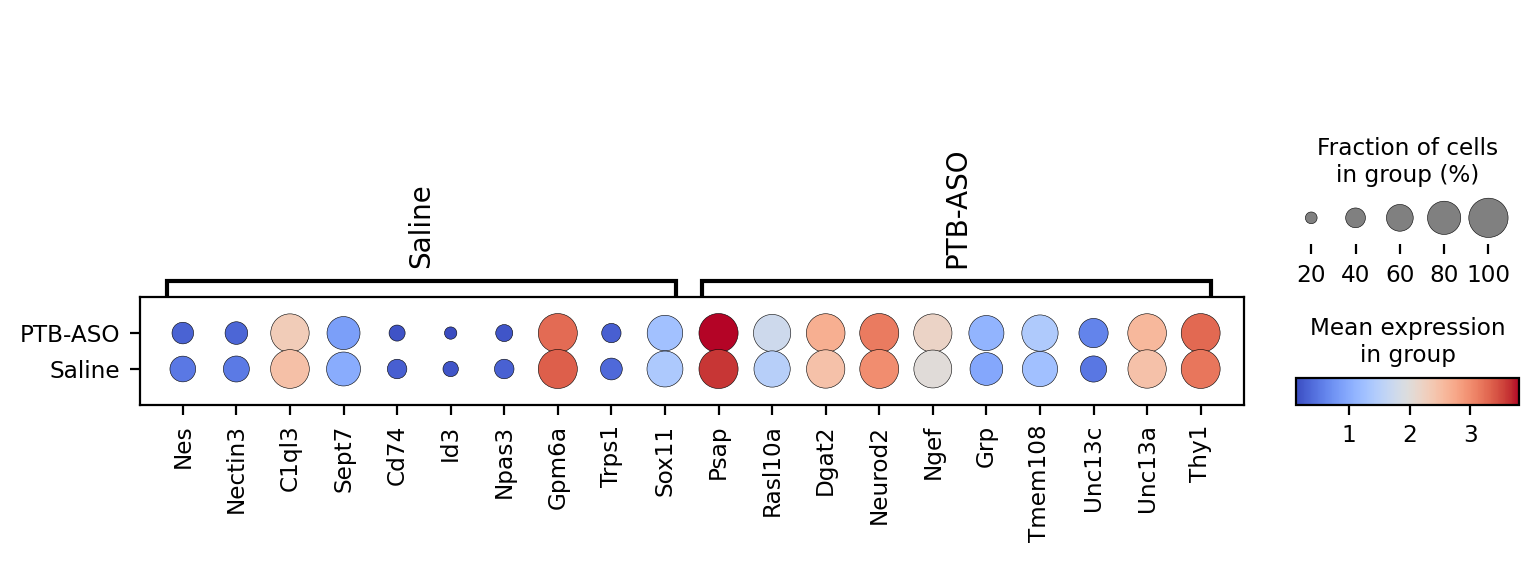

In [18]:
sc.tl.rank_genes_groups(matdgcbm5, 'Treatment')
sc.tl.dendrogram(matdgcbm5, groupby="Treatment")
sc.pl.rank_genes_groups_dotplot(matdgcbm5,n_genes=10, cmap="coolwarm", groups=["Saline", "PTB-ASO"])

/Users/kjenie/DataspellProjects/ptb_timepoints/.conda/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:580: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}
/Users/kjenie/DataspellProjects/ptb_timepoints/.conda/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


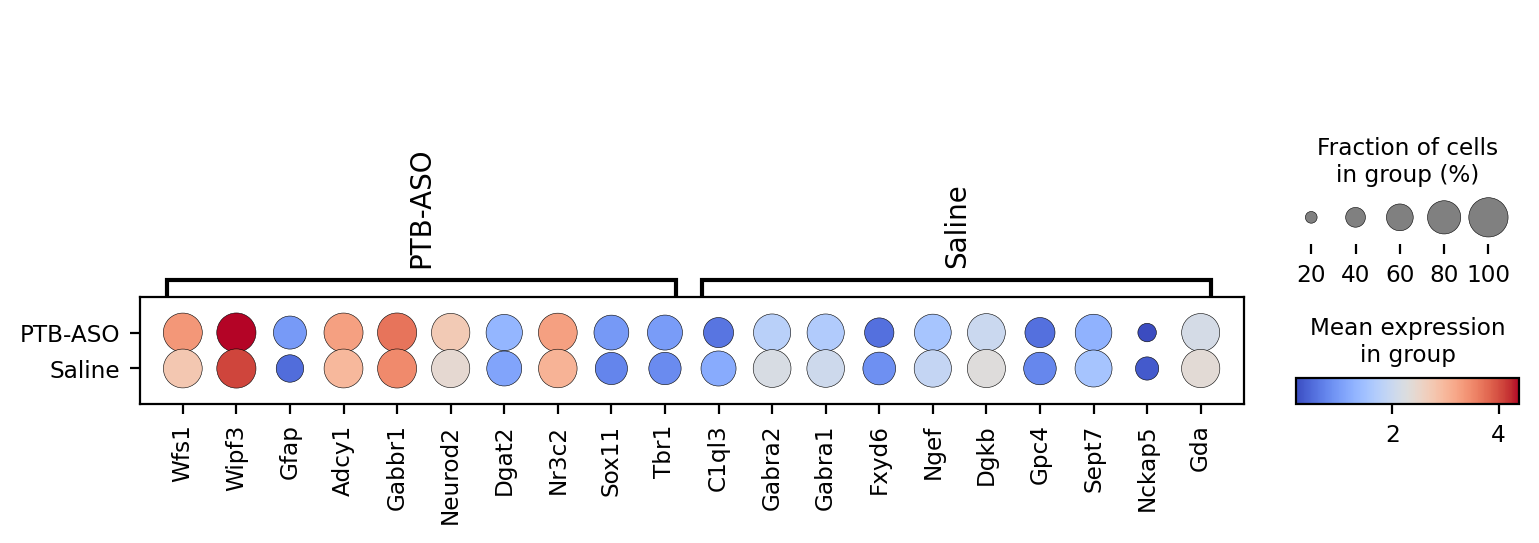

In [19]:
ca1cbm5 = cbm5[cbm5.obs["MERFISH celltype"] == "CA1 neurons"]
ca1cbm5.uns['log1p']["base"] = None
sc.tl.rank_genes_groups(ca1cbm5, 'Treatment')
sc.tl.dendrogram(ca1cbm5, groupby="Treatment")
sc.pl.rank_genes_groups_dotplot(ca1cbm5,n_genes=10, cmap="coolwarm")


/Users/kjenie/DataspellProjects/ptb_timepoints/.conda/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:580: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}
/Users/kjenie/DataspellProjects/ptb_timepoints/.conda/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


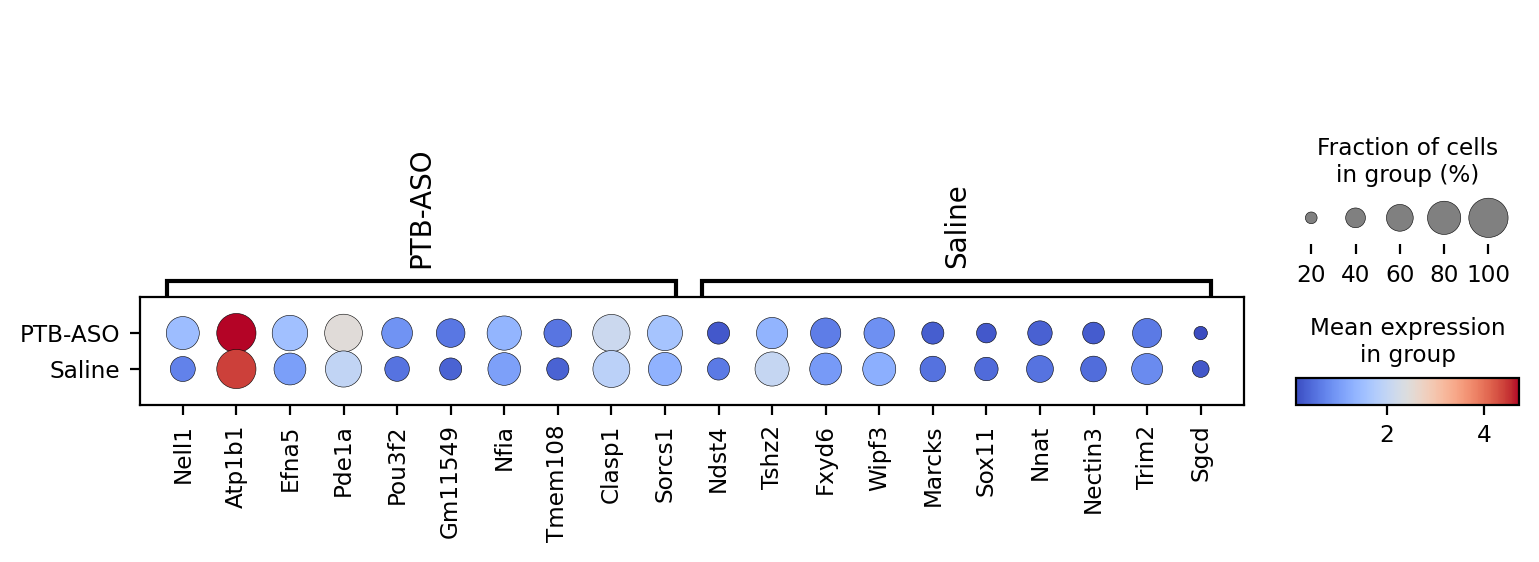

In [20]:
l3cbm5 = cbm5[cbm5.obs["MERFISH celltype"] == "L3 neurons"]
l3cbm5.uns['log1p']["base"] = None
sc.tl.rank_genes_groups(l3cbm5, 'Treatment')
sc.tl.dendrogram(l3cbm5, groupby="Treatment")
sc.pl.rank_genes_groups_dotplot(l3cbm5,n_genes=10, cmap="coolwarm")


# Figure C

Box plots quantification of PTBP1, SOX11, TBR1, GFAP, and CLASP1 mRNA levels within DG, CA1, or L3 neuronal population in saline (blue) and PTBP1-ASO injected mice. 

In [21]:
cbm5 = sc.read("../DataF/fig2/CBM5_new_PTB.h5ad")

/var/folders/j6/2g6n5jcx4dz5dncsnj0mt2p40000gn/T/ipykernel_55855/1616790858.py:33: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/j6/2g6n5jcx4dz5dncsnj0mt2p40000gn/T/ipykernel_55855/1616790858.py:33: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


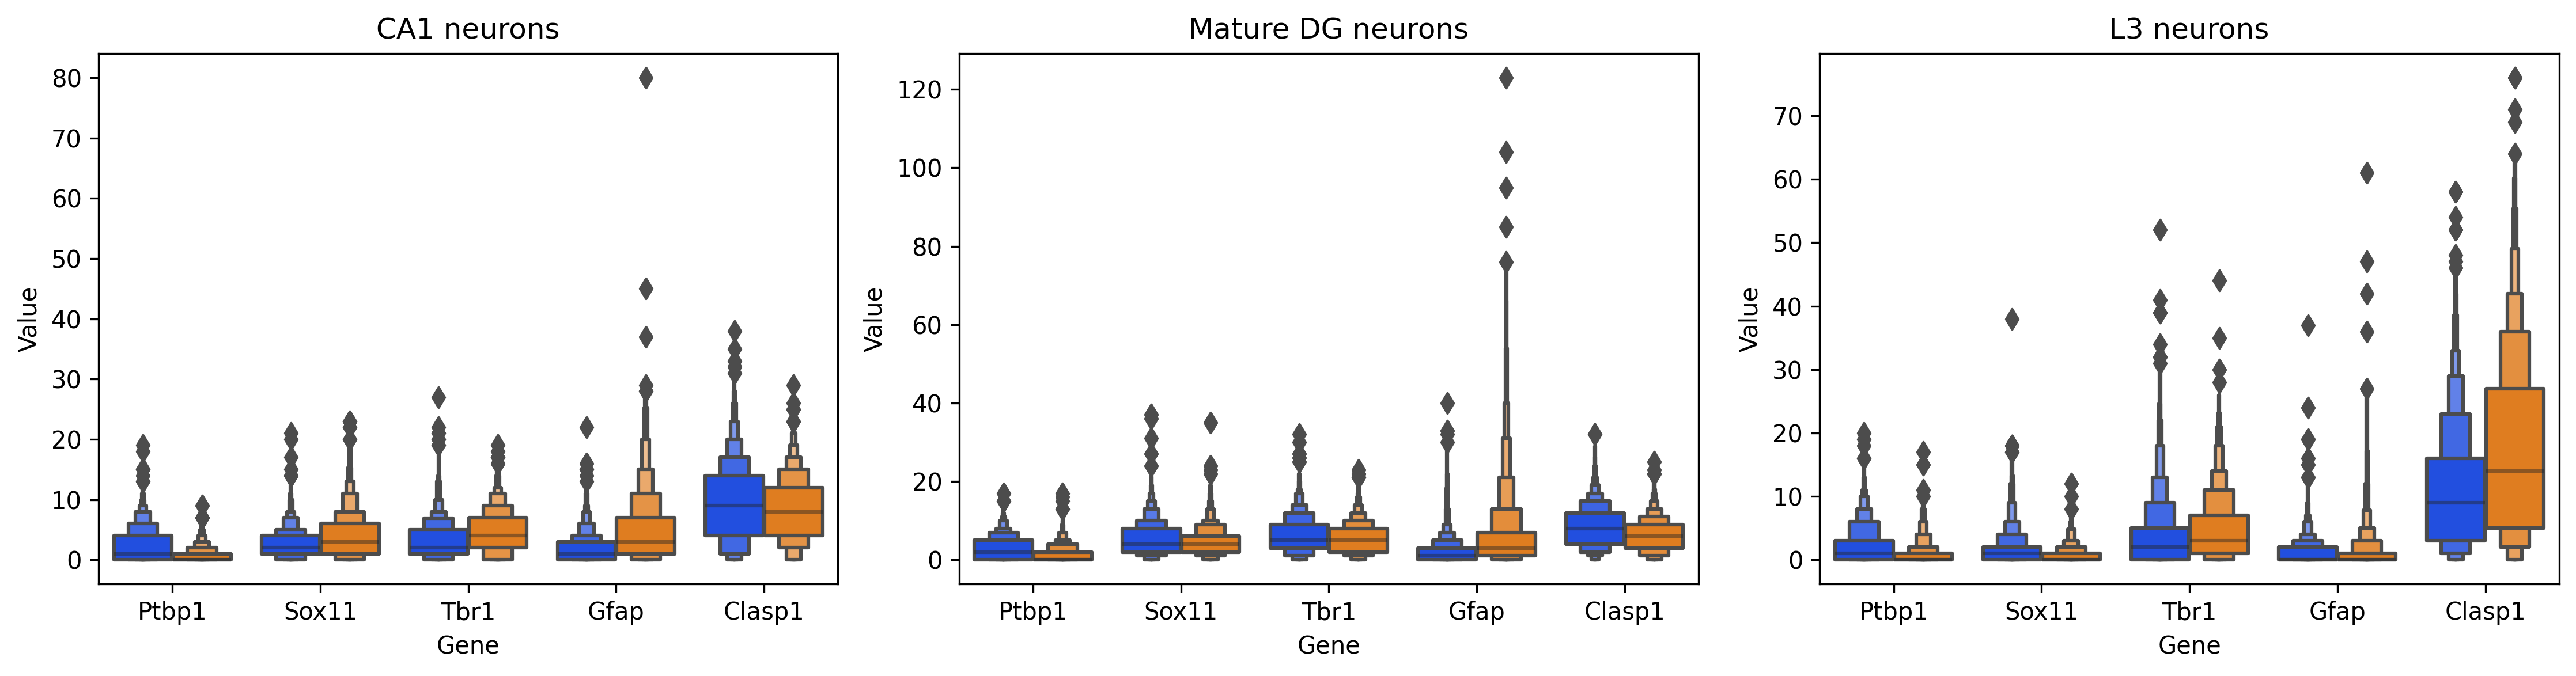

In [22]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use("default")

fig, axs = plt.subplots(1, 3, figsize=(15, 4), dpi=150, facecolor="w")
for i, cell in enumerate(["CA1 neurons", "Mature DG neurons", "L3 neurons"]):
    ax = axs[i]
    
    d = cbm5[cbm5.obs["MERFISH celltype"] == cell]

    df = pd.DataFrame(d.layers["Raw counts"], index=d.to_df().index, columns=d.to_df().columns)
    df["Ptbp1"] = d.obs["New_PTB"]
    df["Treatment"] = d.obs["Treatment"]
    df["MERFISH celltype"] = d.obs["MERFISH celltype"]

    # data
    genes = [ 
        "Ptbp1",
        'Sox11',
        'Tbr1',
        "Gfap",
        "Clasp1",
        ]

    df_melted = df.melt(id_vars=['Treatment'], value_vars=genes)
    sns.boxenplot(data=df_melted, x='variable', y='value', hue="Treatment", hue_order=["Saline", "PTB-ASO"], ax=ax, showfliers=True, palette="bright")
    ax.legend([],[], frameon=False)
    ax.set_title(f"{cell}")
    ax.set_xlabel('Gene')
    ax.set_ylabel('Value')

    plt.tight_layout()